In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
sigmoid function is
1/(1+e^-z)
i)where z can be a single number in case
of just one example, m=1
ii) where z can be a vector of ndarray (m,)
in case of multiple examples

Numpy can handle both using np.exp()
"""

#Input is an array
input_array = np.array([1, 2, 3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val=1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output to exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.71828183  7.3890561  20.08553692]
Input to exp: 1
Output to exp: 2.718281828459045


In [3]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    g = 1/(1+np.exp(-z))
    return g

In [4]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


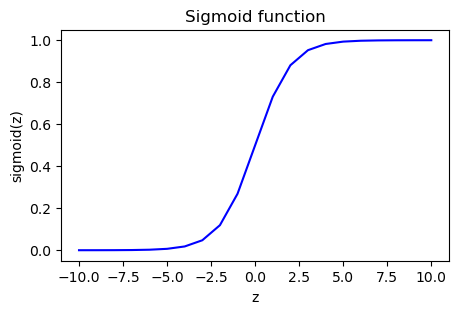

In [6]:
# Plot z vs sigmoid(z)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")
plt.show()

In [51]:
# Just input in, the previous linear regression model into this sigmoid and run using gradient descent

# todo-me: Run Logistic Regression
def compute_cost(X, y, w, b):
    m=X.shape[0]
    z = np.dot(X, w) + b
    diff = sigmoid(z)-y
    cost = np.dot(diff, diff)
    return cost/(2*m)

def compute_gradient(X, y, w, b):
    m, n=X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for j in range(n):
        sum=0
        for i in range(m):
            f_wb_i = np.dot(X[i,:], w)+b
            diff_i = sigmoid(f_wb_i)-y[i]
            each_i = np.exp(-f_wb_i)*(sigmoid(f_wb_i)**2)*diff_i*X[i,j]
            sum+=each_i
        dj_dw[j]=sum/m
    sum=0
    for i in range(m):
        f_wb_i = np.dot(X[i,:], w)+b
        diff_i = sigmoid(f_wb_i)-y[i]
        each_i = np.exp(-f_wb_i)*(sigmoid(f_wb_i)**2)*diff_i
        sum+=each_i
    dj_db=sum/m
    return dj_dw, dj_db

In [52]:
def gradient_descent(X_train, y_train, w_in, b_in, alpha, iterations, compute_cost, compute_gradient):
    m,n=X_train.shape
    w, b = w_in, b_in
    J_cost=[]
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)
        cost = compute_cost(X_train, y_train, w, b)
        w = w-alpha*dj_dw
        b = b-alpha*dj_db
        J_cost.append(cost)
        if i%100==0:
            print(f"Cost of {i}th iteration is:", cost)
    print(f"final w is {w}")
    print(f"final b is {b}")
    return w, b, J_cost

In [59]:
w_init = np.zeros(1)
b_init = 0
X_train = np.array([[1], [2], [3], [4], [5], [7], [8], [9], [10], [11], [12]])
y_train = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])
alpha = 0.1
iterations=10000
w_final, b_final, J_cost = gradient_descent(X_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)
print(w_final, b_final)

Cost of 0th iteration is: 0.125
Cost of 100th iteration is: 0.08847367305176518
Cost of 200th iteration is: 0.07885224753112284
Cost of 300th iteration is: 0.0717056971787701
Cost of 400th iteration is: 0.0664201749707173
Cost of 500th iteration is: 0.062472647869239534
Cost of 600th iteration is: 0.05947743427372116
Cost of 700th iteration is: 0.05716466971920098
Cost of 800th iteration is: 0.055348012245740534
Cost of 900th iteration is: 0.05389819326194078
Cost of 1000th iteration is: 0.052724391128657594
Cost of 1100th iteration is: 0.05176176931503525
Cost of 1200th iteration is: 0.05096325430503268
Cost of 1300th iteration is: 0.05029409671939042
Cost of 1400th iteration is: 0.04972823621615512
Cost of 1500th iteration is: 0.04924583810965025
Cost of 1600th iteration is: 0.04883159842359224
Cost of 1700th iteration is: 0.04847355947321767
Cost of 1800th iteration is: 0.04816226955812288
Cost of 1900th iteration is: 0.04789017806017615
Cost of 2000th iteration is: 0.04765119395963

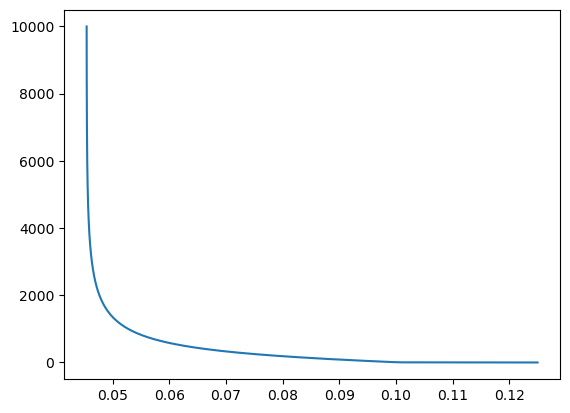

In [61]:
plt.plot(J_cost, np.arange(0, 10000))
plt.show()

In [62]:
def predict(w_final, b_final, X):
    # here x is whole input variable
    f_wb=np.dot(X,w_final)+b_final
    return sigmoid(f_wb)

In [63]:
predict(w_final, b_final, 4)

array([0.227])

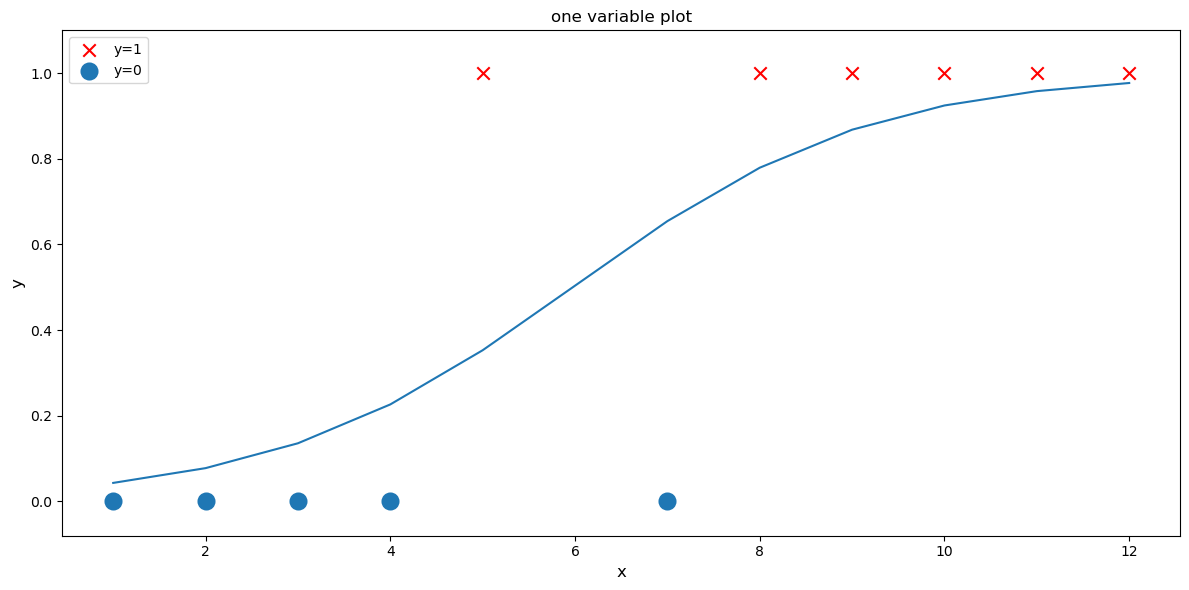

In [70]:
pos=y_train==1
neg=y_train==0
fig, ax=plt.subplots(1, 1, figsize=(12,6))
ax.scatter(X_train[pos], y_train[pos], marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg],y_train[neg],marker='o',s=100,label="y=0",lw=3)
ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.plot(X_train, predict(w_final, b_final, X_train))
ax.legend()
plt.tight_layout()
plt.show()